In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/figs/source/supplemental_1'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
fig_count = 0

# PyFR analysis

In [5]:
pyFR_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

## Across vs within subject analysis

In [6]:
pyfr_locs = plot.compile_df_locs(pyFR_df['R'])
corr_pyfr_locs = np.atleast_2d(pyFR_df['across'])

In [7]:
long_form_across = pd.DataFrame()
long_form_across['Correlation'] = pyFR_df['across']
long_form_across['Subject'] = 'a'
long_form_across['Experiment'] = 'w'
long_form_within = pd.DataFrame()
long_form_within['Correlation'] = pyFR_df['within']
long_form_within['Subject'] = 'w'
long_form_within['Experiment'] = 'w'

In [8]:
long_form_pyfr = long_form_across.append(long_form_within)

6
7


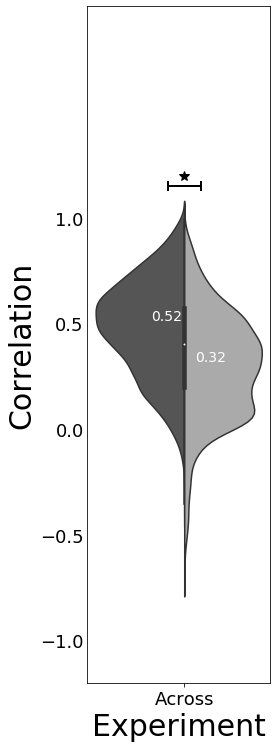

In [9]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
fig = plt.gcf()
fig.set_size_inches(4, 10.5)
plt.ylim(-1.2,2.0)
ax = sns.violinplot(x="Experiment", y="Correlation", hue="Subject", ylim=[-1,1], data=long_form_pyfr, palette="gray", split=True)
ax.legend().set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', which='both', length=0, labelsize=18)

z_long_form_pyfr = long_form_pyfr.copy(deep=True)
z_long_form_pyfr['Correlation'] = plot.r2z(z_long_form_pyfr['Correlation'])
yposlist = plot.z2r(z_long_form_pyfr.groupby(['Experiment', 'Subject'])['Correlation'].mean())

xposlist = range(1)

c = 0
for i in range(len(yposlist)):

    if (i%2) == 0:
        ax.text(c-.15, yposlist[i], np.round(yposlist[i],2), fontsize=14, color='white')
    else:
        ax.text(c+.05, yposlist[i], np.round(yposlist[i],2) , fontsize=14, color='white')
        c +=1

### first two significance lines:
ylim = 1.2
for l in range(1):
    plt.plot([l-.075, l+.075], [1.15, 1.15], marker = '|', mew=2, markersize=10, color='k', linewidth=2)
    ax.plot(l, 1.15 + .05, marker = '*', markersize=10, color='k')
    
ax.set_xticklabels(['Across', 'All', 'Within'])
ax.set_ylabel('Correlation', fontsize=30)
ax.set_xlabel('Experiment', fontsize=30)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index > 5:
        print(index)
        label.set_visible(False)

plt.tight_layout()
plt.savefig(outfile)

# RAM

In [10]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

In [11]:
dfs = ['W_a_a', 'W_a_all', 'W_a_w', 'W_w_a', 'W_w_all', 'W_w_w']

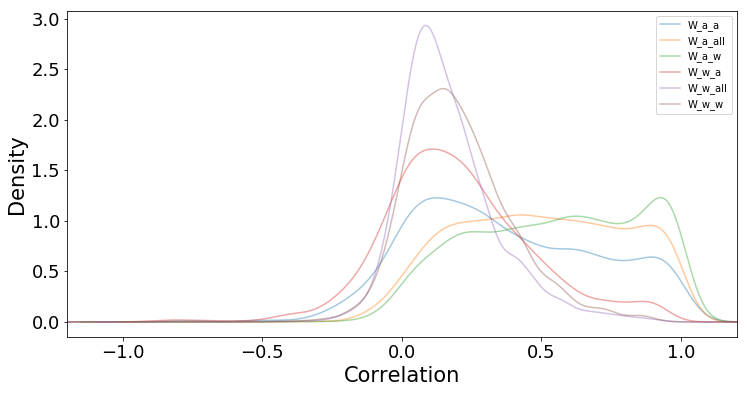

In [12]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

ax = RAM_df[dfs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [13]:
plot.z2r(plot.r2z(RAM_df[dfs]).mean())

W_a_a      0.472307
W_a_all    0.605268
W_a_w      0.681418
W_w_a      0.228546
W_w_all    0.177363
W_w_w      0.216240
dtype: float64

In [14]:
within_dfs = ['W_w_a', 'W_w_all', 'W_w_w']

across_dfs = ['W_a_a', 'W_a_all', 'W_a_w']

In [15]:
all_subject_e = np.array([])
all_W_w_w = np.array([])
all_W_a_w = np.array([])
all_W_a_all= np.array([])
all_W_a_a = np.array([])
all_W_w_all = np.array([])
all_W_w_a = np.array([])


all_R_e = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    all_subject_e = np.append(all_subject_e, item)
    all_W_w_w = np.append(all_W_w_w, RAM_df['W_w_w'].iloc[i])
    all_W_a_w = np.append(all_W_a_w, RAM_df['W_a_w'].iloc[i])
    all_W_a_all= np.append(all_W_a_all, RAM_df['W_a_all'].iloc[i])
    all_W_a_a = np.append(all_W_a_a, RAM_df['W_a_a'].iloc[i])
    all_W_w_all = np.append(all_W_w_all, RAM_df['W_w_all'].iloc[i])
    all_W_w_a = np.append(all_W_w_a, RAM_df['W_w_a'].iloc[i])
    all_R_e = np.append(all_R_e, RAM_df['R'].iloc[i])

corr_all_e_df = pd.DataFrame()
corr_all_e_df['Subject'] = all_subject_e
corr_all_e_df['W_w_w'] = plot.r2z(all_W_w_w)
corr_all_e_df['W_a_w'] = plot.r2z(all_W_a_w )
corr_all_e_df['W_a_all'] = plot.r2z(all_W_a_all)
corr_all_e_df['W_a_a'] = plot.r2z(all_W_a_a)
corr_all_e_df['W_w_all'] = plot.r2z(all_W_w_all )
corr_all_e_df['W_w_a'] = plot.r2z(all_W_w_a )

corr_all_e_df['R'] = all_R_e

corr_all_e_df.dropna(inplace=True)

grouped_results_within = corr_all_e_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all'].mean()

grouped_results_within


,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all
Subject,,,,,,
0.0,0.219335,0.227032,0.188312,0.824195,0.312150,0.815626
1.0,0.086401,0.049168,0.073796,0.505154,0.363341,0.490492
2.0,0.091786,0.468861,0.138985,1.185209,0.548432,0.760054
3.0,0.089896,0.138021,0.139651,0.607879,0.375316,0.575043
4.0,0.412031,0.294355,0.138055,1.435772,0.459055,0.880029
5.0,0.183028,0.135966,0.113461,0.614582,0.360269,0.512691
6.0,0.125466,0.098759,0.145685,0.534119,0.224572,0.410208
7.0,0.184410,0.210114,0.137229,0.470173,0.248892,0.240021
8.0,0.121263,0.091227,0.119802,0.452850,0.098912,0.437992


In [16]:
def p_level(p):
    if .05 <= p <.1:
        return('+')
    if .01 <= p < .05:
        return('*')
    if .001 <= p < .01:
        return('**')
    if .0001 <= p < .001:
        return('***')
    if .00001 <= p < .0001:
        return('d')
    if .000001 <= p < .00001:
        return('dd')
    if p < .000001:
        return('ddd')

In [17]:


## this didnt work... need to separate subject id from electrode number
grouped_within_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_] = grouped_results_within[df_].values
        f_corrs[f_] = grouped_results_within[f_].values
        tstat = stats.ttest_rel(f_corrs[df_], f_corrs[f_])
        grouped_within_t_test = grouped_within_t_test.append({
            'Column_1' : df_,
            'Column_2' : f_, 
            't' : tstat[0],
            'p' : tstat[1], 
            'level' : p_level(tstat[1])
            
            }, ignore_index=True)

In [18]:
grouped_within_t_test

,Column_1,Column_2,t,p,level
0,W_a_a,W_a_all,-6.231102,2.338552e-06,dd
1,W_a_a,W_a_w,-6.198849,2.524535e-06,dd
2,W_a_a,W_w_a,4.707709,9.644781e-05,d
3,W_a_a,W_w_all,4.313595,2.576893e-04,***
4,W_a_a,W_w_w,3.793743,9.375804e-04,***
5,W_a_all,W_a_w,-2.337943,2.845278e-02,*
6,W_a_all,W_w_a,9.916614,8.950976e-10,ddd
7,W_a_all,W_w_all,8.562092,1.312167e-08,ddd
8,W_a_all,W_w_w,8.256738,2.484062e-08,ddd
9,W_a_w,W_w_a,8.119965,3.319388e-08,ddd


In [19]:
all_subject_e = np.array([])
all_W_w_w = np.array([])
all_W_a_w = np.array([])
all_W_a_all= np.array([])
all_W_a_a = np.array([])
all_W_w_all = np.array([])
all_W_w_a = np.array([])


all_R_e = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject_e = np.append(all_subject_e, item)
    all_W_w_w = np.append(all_W_w_w, RAM_df['W_w_w'].iloc[i])
    all_W_a_w = np.append(all_W_a_w, RAM_df['W_a_w'].iloc[i])
    all_W_a_all= np.append(all_W_a_all, RAM_df['W_a_all'].iloc[i])
    all_W_a_a = np.append(all_W_a_a, RAM_df['W_a_a'].iloc[i])
    all_W_w_all = np.append(all_W_w_all, RAM_df['W_w_all'].iloc[i])
    all_W_w_a = np.append(all_W_w_a, RAM_df['W_w_a'].iloc[i])
    all_R_e = np.append(all_R_e, RAM_df['R'].iloc[i])

corr_all_e_df = pd.DataFrame()
corr_all_e_df['Subject'] = all_subject_e
corr_all_e_df['W_w_w'] = plot.r2z(all_W_w_w)
corr_all_e_df['W_a_w'] = plot.r2z(all_W_a_w )
corr_all_e_df['W_a_all'] = plot.r2z(all_W_a_all)
corr_all_e_df['W_a_a'] = plot.r2z(all_W_a_a)
corr_all_e_df['W_w_all'] = plot.r2z(all_W_w_all )
corr_all_e_df['W_w_a'] = plot.r2z(all_W_w_a )

corr_all_e_df['R'] = all_R_e

corr_all_e_df.dropna(inplace=True)

grouped_results_within = corr_all_e_df.groupby('Subject')['W_w_all', 'W_w_a', 'W_w_w', ].mean()

grouped_results_within

grouped_results_across = corr_all_e_df.groupby('Subject')['W_a_all','W_a_a', 'W_a_w'].mean()

grouped_results_across


,W_a_all,W_a_a,W_a_w
Subject,,,
0.0,0.815626,0.312150,0.824195
1.0,0.490492,0.363341,0.505154
2.0,0.760054,0.548432,1.185209
3.0,0.575043,0.375316,0.607879
4.0,0.880029,0.459055,1.435772
5.0,0.512691,0.360269,0.614582
6.0,0.410208,0.224572,0.534119
7.0,0.240021,0.248892,0.470173
8.0,0.437992,0.098912,0.452850


In [20]:
## this didnt work... need to separate subject id from electrode number
grouped_within_t_test_within = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in within_dfs[0:]:
    i += 1
    for f_ in within_dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_] = grouped_results_within[df_].values
        f_corrs[f_] = grouped_results_within[f_].values
        tstat = stats.ttest_rel(f_corrs[df_], f_corrs[f_])
        grouped_within_t_test_within = grouped_within_t_test_within.append({
            'Column_1' : df_,
            'Column_2' : f_, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [21]:

        
grouped_within_t_test_across = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in across_dfs[0:]:
    i += 1
    for f_ in across_dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_] = grouped_results_across[df_].values
        f_corrs[f_] = grouped_results_across[f_].values
        tstat = stats.ttest_rel(f_corrs[df_], f_corrs[f_])
        grouped_within_t_test_across  = grouped_within_t_test_across .append({
            'Column_1' : df_,
            'Column_2' : f_, 
            't' : tstat[0],
            'p' : tstat[1],
            'level' : p_level(tstat[1])
            }, ignore_index=True)

In [22]:
grouped_within_t_test_across

,Column_1,Column_2,t,p,level
0,W_a_a,W_a_all,-6.231102,0.000002,dd
1,W_a_a,W_a_w,-6.198849,0.000003,dd
2,W_a_all,W_a_w,-2.337943,0.028453,*


In [23]:
grouped_within_t_test_within

,Column_1,Column_2,t,p
0,W_w_a,W_w_all,1.141652,0.265346
1,W_w_a,W_w_w,-0.392580,0.698245
2,W_w_all,W_w_w,-2.589545,0.016389


In [24]:
def long_form_df(full_df, df_col):

    long_form = pd.DataFrame()
    long_form['Correlation'] = full_df[df_col]
    long_form['Subject'] = df_col.split('_')[1]
    long_form['Experiment'] = df_col.split('_')[2]
    
    return long_form

long_form = long_form_df(RAM_df, dfs[0])
for df_ in dfs[1:]:
    long_form = long_form.append(long_form_df(RAM_df, df_))


In [25]:
long_form.head()

,Correlation,Subject,Experiment
0,0.242494,a,a
1,0.177056,a,a
2,0.234188,a,a
3,0.336156,a,a
4,0.024989,a,a


## plot all patients that participated in both experiments

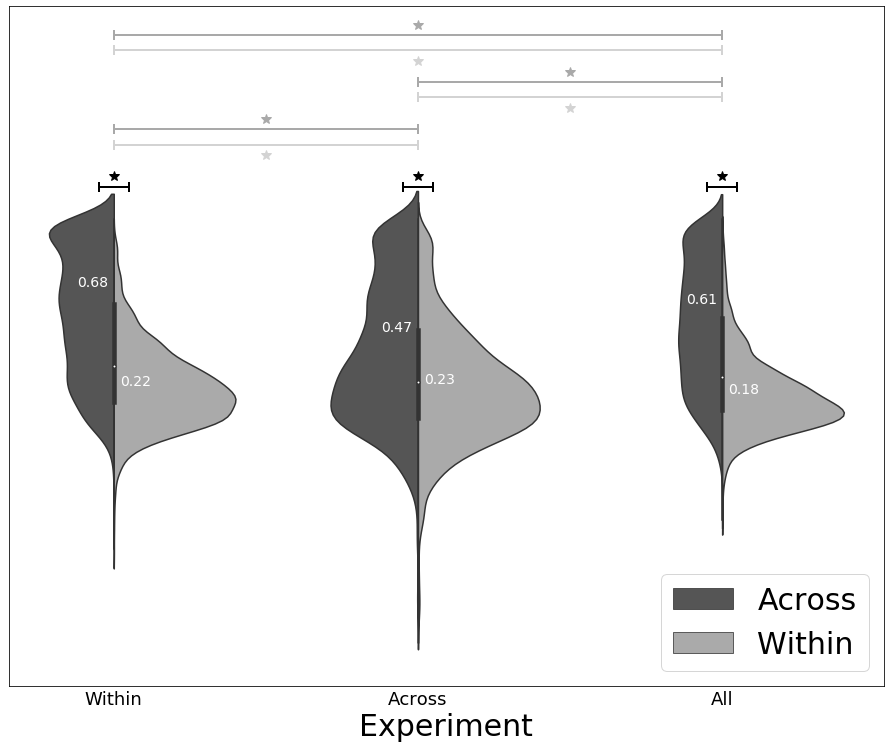

In [26]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_form, yticks=False, outfile=outfile)

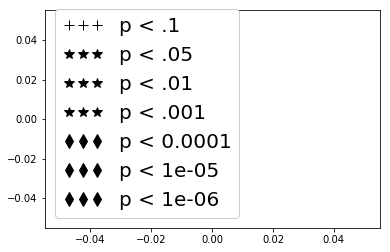

In [27]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["p < .1", "p < .05", "p < .01", "p < .001", "p < " + str(10**-4), "p < " + str(10**-5), "p < " + str(10**-6)]
markers = ['+', '*', '*', '*', 'd', 'd', 'd']

f = lambda m,c: plt.plot([],[],marker=m, color=c, markersize=10, ls="none")[0]
handles = [f(markers[i], 'k') for i in range(7)]


labels =labels
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=True, numpoints=3, fontsize=20)

def export_legend(legend, filename=os.path.join(fig_dir,'legend.pdf'), expand=[-4,-4,4,4]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)


## FR

In [28]:
str_find = '_FR1'
str_find
FR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [29]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [30]:
plot.z2r(plot.r2z(FR_df[dfs]).mean())

W_a_a      0.532599
W_a_all    0.620370
W_a_w      0.662453
W_w_a      0.218420
W_w_all    0.195875
W_w_w      0.237721
dtype: float64

In [31]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    fr_subject = np.append(fr_subject, item)
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [32]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

In [33]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

In [34]:
long_formFR = long_form_df(FR_df, dfs[0])
for df_ in dfs[1:]:
    long_formFR = long_formFR.append(long_form_df(FR_df, df_))


6
7


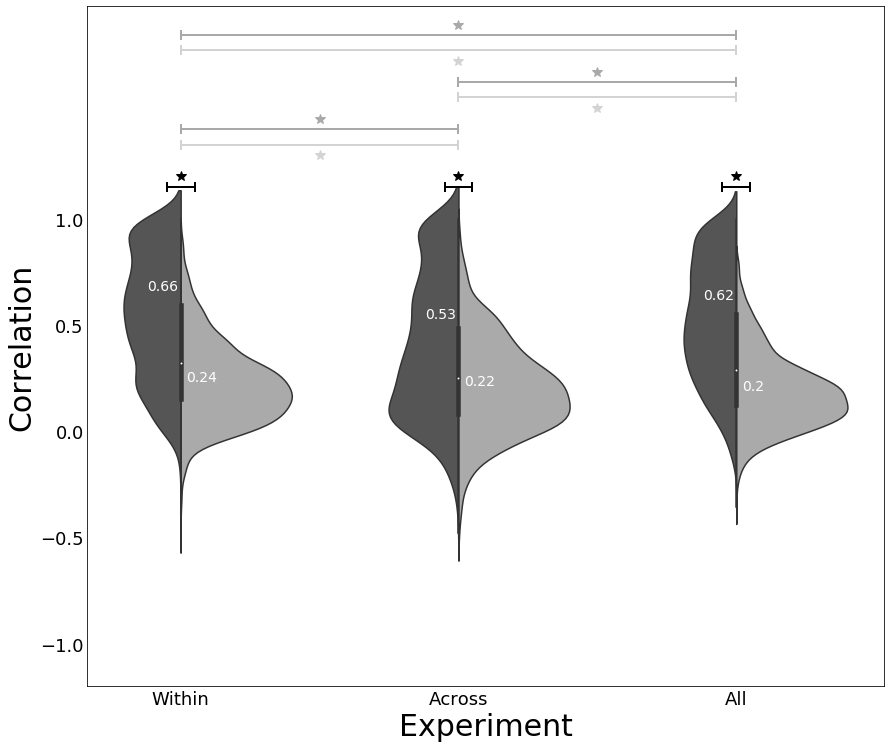

In [35]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formFR, legend=False, outfile=outfile)

In [36]:
fr_subject_e = np.array([])
fr_W_w_w = np.array([])
fr_W_a_w = np.array([])
fr_W_a_all= np.array([])
fr_W_a_a = np.array([])
fr_W_w_all = np.array([])
fr_W_w_a = np.array([])


fr_R_e = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    fr_subject_e = np.append(fr_subject_e, item)
    fr_W_w_w = np.append(fr_W_w_w, FR_df['W_w_w'].iloc[i])
    fr_W_a_w = np.append(fr_W_a_w, FR_df['W_a_w'].iloc[i])
    fr_W_a_all= np.append(fr_W_a_all, FR_df['W_a_all'].iloc[i])
    fr_W_a_a = np.append(fr_W_a_a, FR_df['W_a_a'].iloc[i])
    fr_W_w_all = np.append(fr_W_w_all, FR_df['W_w_all'].iloc[i])
    fr_W_w_a = np.append(fr_W_w_a, FR_df['W_w_a'].iloc[i])
    fr_R_e = np.append(fr_R_e, FR_df['R'].iloc[i])

corr_fr_e_df = pd.DataFrame()
corr_fr_e_df['Subject'] = fr_subject_e
corr_fr_e_df['W_w_w'] = plot.r2z(fr_W_w_w)
corr_fr_e_df['W_a_w'] = plot.r2z(fr_W_a_w )
corr_fr_e_df['W_a_all'] = plot.r2z(fr_W_a_all)
corr_fr_e_df['W_a_a'] = plot.r2z(fr_W_a_a)
corr_fr_e_df['W_w_all'] = plot.r2z(fr_W_w_all)
corr_fr_e_df['W_w_a'] = plot.r2z(fr_W_w_a )

corr_fr_e_df['R'] = fr_R_e

corr_fr_e_df.dropna(inplace=True)

grouped_results_fr = corr_fr_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_fr

## this didnt work... need to separate subject id from electrode number
grouped_fr_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_] = grouped_results_fr[df_].values
        f_corrs[f_] = grouped_results_fr[f_].values
        tstat = stats.ttest_rel(f_corrs[df_], f_corrs[f_])
        grouped_fr_t_test = grouped_fr_t_test.append({
            'Column_1' : df_,
            'Column_2' : f_, 
            't' : tstat[0],
            'p' : tstat[1],
            'level' : p_level(tstat[1])
            }, ignore_index=True)

In [37]:
grouped_results_fr.head()

,W_a_a,W_a_all,W_a_w,W_w_w,W_w_all,W_w_a
Subject,,,,,,
0.0,0.247094,0.694877,0.650405,0.203220,0.188120,0.208441
1.0,0.580976,0.411948,0.269297,0.050210,0.104204,0.085265
2.0,0.090166,0.329801,0.709230,0.295617,0.092890,0.038305
3.0,0.462300,0.660974,0.261489,0.140451,0.150425,0.170120
4.0,0.502769,1.056973,1.712125,0.454434,0.102588,0.215316


In [38]:
grouped_fr_t_test

,Column_1,Column_2,t,p,level
0,W_a_a,W_a_all,-3.200487,3.974051e-03,**
1,W_a_a,W_a_w,-2.839417,9.287546e-03,**
2,W_a_a,W_w_a,3.716965,1.132987e-03,**
3,W_a_a,W_w_all,3.586675,1.560138e-03,**
4,W_a_a,W_w_w,3.038543,5.836512e-03,**
5,W_a_all,W_a_w,-0.528224,6.024038e-01,None
6,W_a_all,W_w_a,9.515859,1.933480e-09,ddd
7,W_a_all,W_w_all,8.934286,6.128655e-09,ddd
8,W_a_all,W_w_w,8.333494,2.113409e-08,ddd
9,W_a_w,W_w_a,6.268843,2.138567e-06,dd


## CatFR

In [39]:
str_find = '_CatFR1'
str_find
CatFR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [40]:
plot.z2r(plot.r2z(CatFR_df[dfs]).mean())

W_a_a      0.417183
W_a_all    0.592052
W_a_w      0.696882
W_w_a      0.237132
W_w_all    0.161497
W_w_w      0.197778
dtype: float64

In [41]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject = np.append(catfr_subject, item)
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [42]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

In [43]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

In [44]:
long_formCatFR = long_form_df(CatFR_df, dfs[0])
for df_ in dfs[1:]:
    long_formCatFR = long_formCatFR.append(long_form_df(CatFR_df, df_))


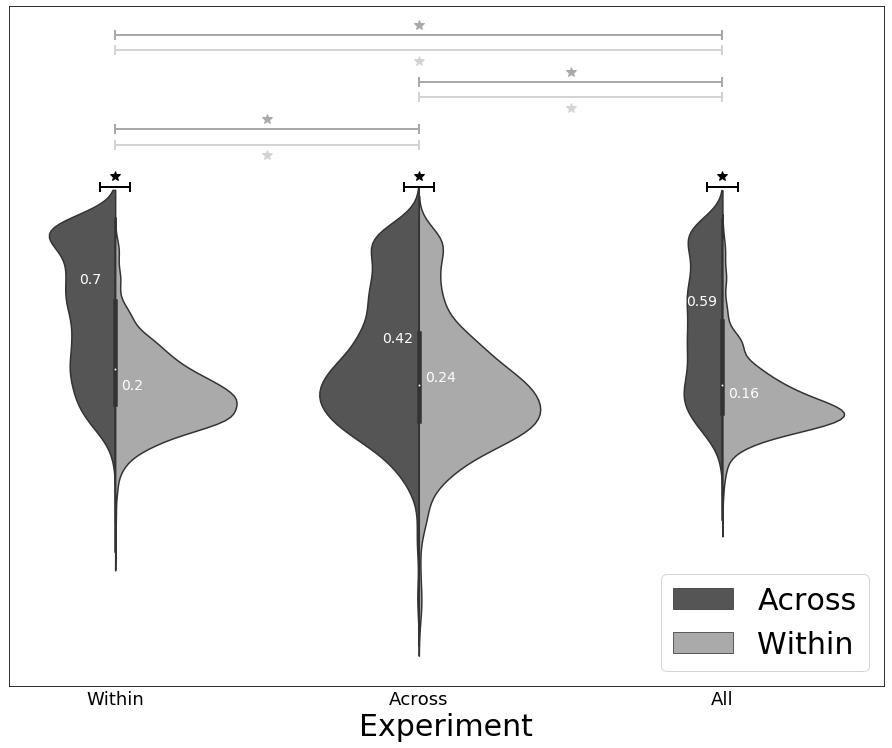

In [45]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formCatFR, yticks=False, outfile=outfile)

In [46]:
catfr_subject_e = np.array([])
catfr_W_w_w = np.array([])
catfr_W_a_w = np.array([])
catfr_W_a_all= np.array([])
catfr_W_a_a = np.array([])
catfr_W_w_all = np.array([])
catfr_W_w_a = np.array([])


catfr_R_e = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject_e = np.append(catfr_subject_e, item)
    catfr_W_w_w = np.append(catfr_W_w_w, CatFR_df['W_w_w'].iloc[i])
    catfr_W_a_w = np.append(catfr_W_a_w, CatFR_df['W_a_w'].iloc[i])
    catfr_W_a_all= np.append(catfr_W_a_all, CatFR_df['W_a_all'].iloc[i])
    catfr_W_a_a = np.append(catfr_W_a_a, CatFR_df['W_a_a'].iloc[i])
    catfr_W_w_all = np.append(catfr_W_w_all, CatFR_df['W_w_all'].iloc[i])
    catfr_W_w_a = np.append(catfr_W_w_a, CatFR_df['W_w_a'].iloc[i])
    catfr_R_e = np.append(catfr_R_e, CatFR_df['R'].iloc[i])

corr_catfr_e_df = pd.DataFrame()
corr_catfr_e_df['Subject'] = catfr_subject_e
corr_catfr_e_df['W_w_w'] = plot.r2z(catfr_W_w_w)
corr_catfr_e_df['W_a_w'] = plot.r2z(catfr_W_a_w )
corr_catfr_e_df['W_a_all'] = plot.r2z(catfr_W_a_all)
corr_catfr_e_df['W_a_a'] = plot.r2z(catfr_W_a_a)
corr_catfr_e_df['W_w_all'] = plot.r2z(catfr_W_w_all)
corr_catfr_e_df['W_w_a'] = plot.r2z(catfr_W_w_a )

corr_catfr_e_df['R'] = catfr_R_e

corr_catfr_e_df.dropna(inplace=True)

grouped_results_catfr = corr_catfr_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_catfr

## this didnt work... need to separate subject id catfrom electrode number
grouped_catfr_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_] = grouped_results_catfr[df_].values
        f_corrs[f_] = grouped_results_catfr[f_].values
        tstat = stats.ttest_rel(f_corrs[df_], f_corrs[f_])
        grouped_catfr_t_test = grouped_catfr_t_test.append({
            'Column_1' : df_,
            'Column_2' : f_, 
            't' : tstat[0],
            'p' : tstat[1],
            'level' : p_level(tstat[1])
            }, ignore_index=True)

In [47]:
grouped_catfr_t_test

,Column_1,Column_2,t,p,level
0,W_a_a,W_a_all,-3.226373,3.735451e-03,**
1,W_a_a,W_a_w,-5.735482,7.674318e-06,dd
2,W_a_a,W_w_a,5.023335,4.402237e-05,d
3,W_a_a,W_w_all,4.710537,9.577094e-05,d
4,W_a_a,W_w_w,4.051262,4.952687e-04,***
5,W_a_all,W_a_w,-2.649977,1.430969e-02,*
6,W_a_all,W_w_a,7.703502,8.148573e-08,ddd
7,W_a_all,W_w_all,6.769017,6.645333e-07,ddd
8,W_a_all,W_w_w,6.130625,2.969264e-06,dd
9,W_a_w,W_w_a,8.540556,1.372024e-08,ddd
